# KNN classification of Iris dataset

In [1]:
##import all the libraries and framework
import numpy as np
import pandas as pd

In [2]:
## loading a dataset

iris_data = pd.read_csv('Iris.csv')

In [3]:
iris_data.head(5)      ##explore head of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.shape

(150, 6)

#### we can say from above that dataset contains 150 rows and 6 columns

now describe dataset

In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### finding number of instances from each class

In [6]:
iris_data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']

In [8]:
X = iris_data[features].values

In [9]:
y= iris_data['Species'].values

In [10]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

#### since knn classifier does not accepts string as labels we need to encode them

In [11]:
from sklearn.preprocessing import LabelEncoder ##import sklearn LabelEncoder

In [12]:
la_en = LabelEncoder()

In [13]:
y = la_en.fit_transform(y)  ### encoding string values to numbers

In [14]:
print(set(y.tolist()))  ### now we can see that we have only three labels or classes

{0, 1, 2}


In [15]:
from sklearn.cross_validation import train_test_split

/home/karma/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Now we have split our data into train and test we need to find a optimal value for k
### Let's visualize data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

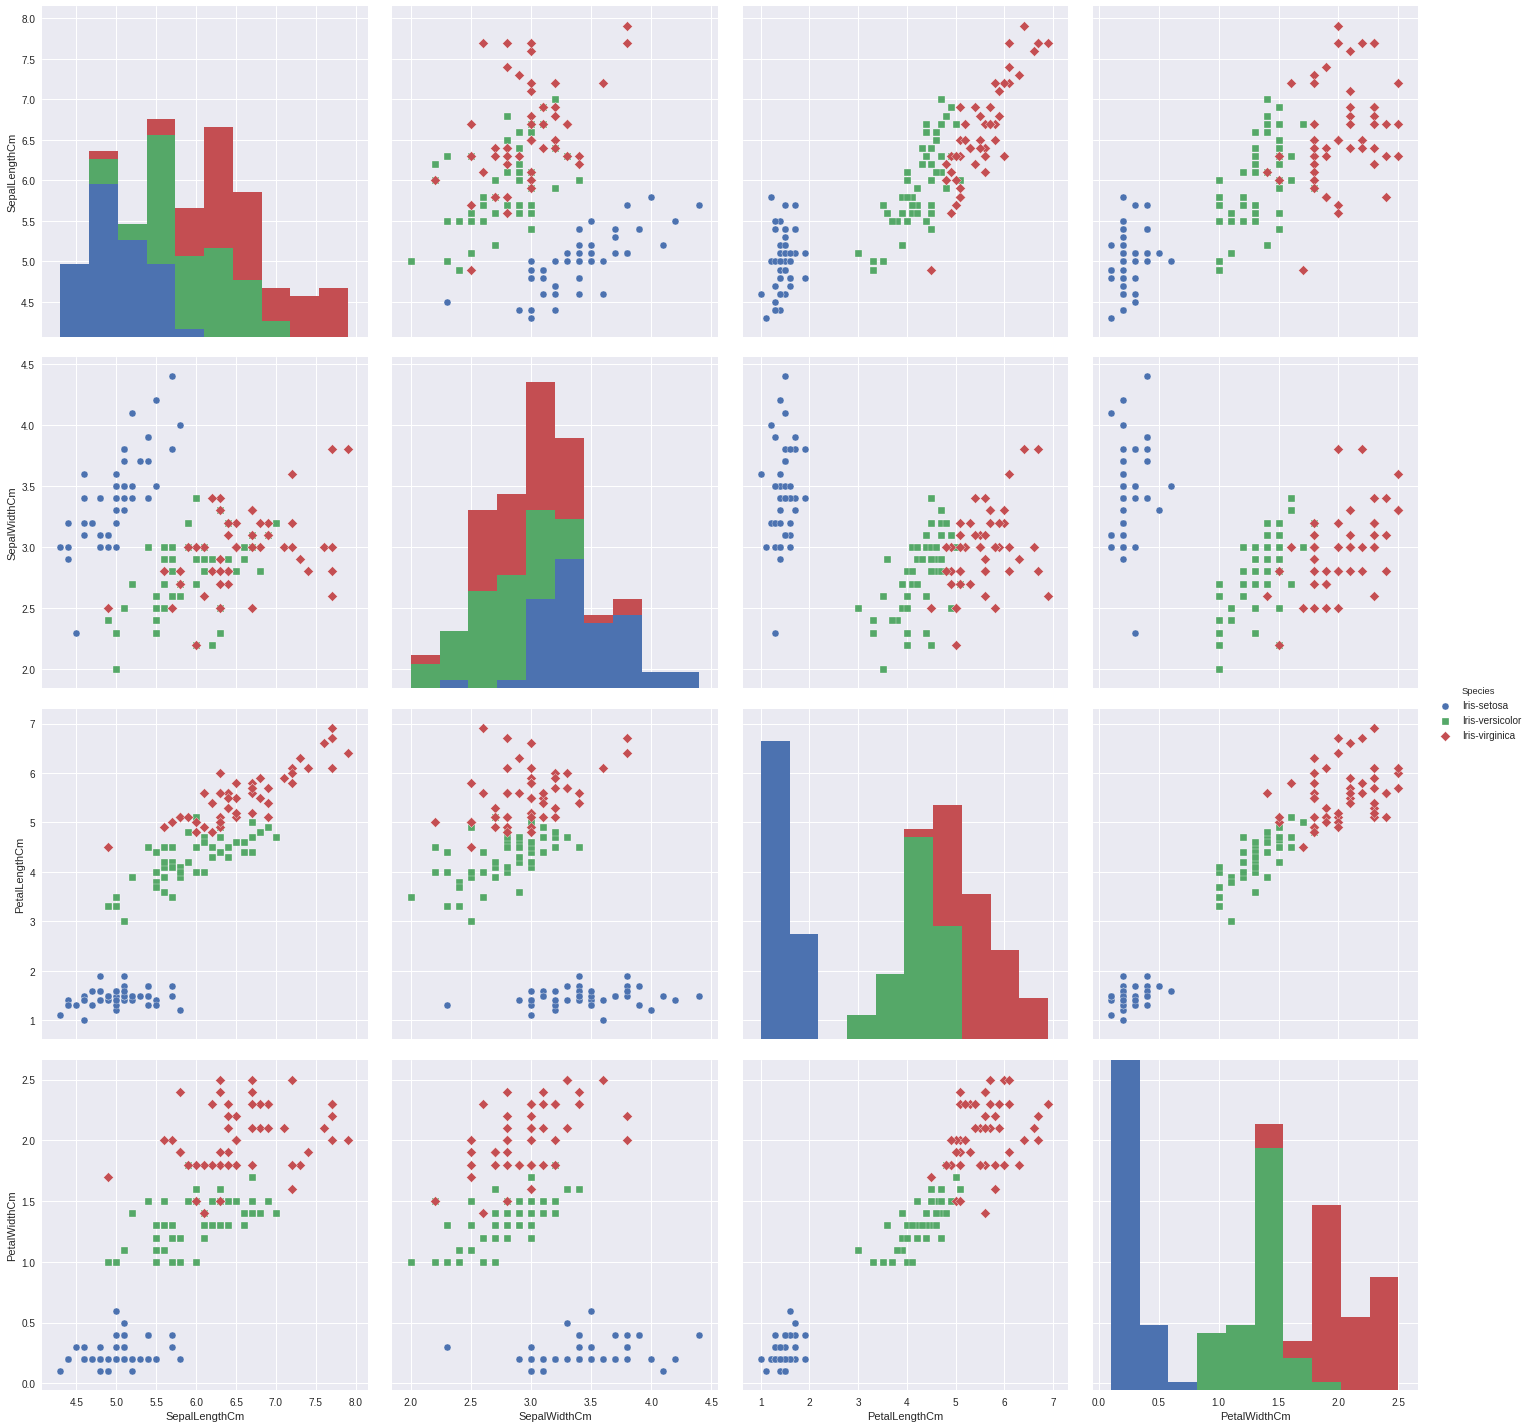

In [18]:
plt.figure()
sns.pairplot(iris_data.drop("Id", axis=1), hue = "Species", size=5, markers=["o", "s", "D"])
plt.show()

### Time for prediction

In [19]:
### import sklearn libraries

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [22]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [23]:
y_pred = knn_classifier.predict(X_test)

In [24]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [25]:
accuracy = accuracy_score(y_test,y_pred)*100
print('accuracy = ' , accuracy ,'%' )

accuracy =  96.66666666666667 %


# Let's try SVM 

In [26]:
from sklearn import svm

In [27]:
clf = svm.SVC(gamma=0.001,C=100)

In [28]:
clf.fit(X_train , y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
predict  = clf.predict(X_test)

In [31]:
predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [32]:
accuracy_svm = accuracy_score(y_test , predict)

In [40]:
print('accuracy by svm = ' , accuracy_svm*100)

accuracy by svm =  100.0


we can see that 100.0 accuracy that means it correctly classify data!!

### wait!!

#### it's overfitting due to less amount of data